# Pandemic Vulnerability Index (PVI)

----------

## Question : What contributes to vaccine hesitancy?
----------
### Final csv `PVI_05_Oct_results_clean.csv`

- shape (3142, 23)

22 measures
       
 4   Cases              3142 non-null   int64  
 5   Deaths             3142 non-null   int64  
 6   Sick               3140 non-null   float64
 7   Spread             3136 non-null   float64
 8   DaytimePopDensity  3142 non-null   float64
 9   Traffic            3142 non-null   float64
 10  SVIHousing         3142 non-null   float64
 11  Vaccines           3142 non-null   float64
 12  DistancingGrade    3142 non-null   float64
 13  Testing            3142 non-null   int64  
 14  PctBeds            3142 non-null   float64
 15  PctVentilators     3142 non-null   float64
 16  PctBlack           3142 non-null   float64
 17  PctNative          3142 non-null   float64
 18  AirPollution       3108 non-null   float64
 19  PctGE65            3142 non-null   float64
 23  Obesity            3142 non-null   float64
 24  PctNoIns           3142 non-null   float64
 25  SVISocioeconomic   3142 non-null   float64



The original key indicators from the data, their weights in the final PVI and their meaning.
The PVI model gives an idex for each of these in the dataset we are currently exploring.
       
- Infection Rate = 25% in total
  - Transmissible Cases = 20% 
      - Daily
      - The initial number represented cases from the last 14 days divided by population size. Because of the 14-day incubation period, the cases identified in that time period are the most likely to be transmissible. This metric is the number of such “contagious” individuals relative to the population, so a greater number indicates more likely continued spread of disease.
  - Disease Spread = 5%
      - Daily
      - The initial number represented Fraction of total cases that are from the last 14 days (one incubation period). Because COVID-19 is thought to have an incubation period of about 14 days, only a sustained decline in new infections over 2 weeks is sufficient to signal reduction in disease spread. This metric is always between 0 and 1, with values near 1 during exponential growth phase, and declining linearly to zero over 14 days if there are no new infections.
- Pop Concentration = 15% in total
  - Pop Mobility = 10%
      - Static
      - The initial number represented Estimated daytime population. Greater daytime population density is expected to increase the spread of infection because more people are in closer proximity to each other.
  - Residential Density = 5%
      - Static
      - The initial number represented Average traffic volume per meter of major roadways in the county from 2018 EPA EJSCREEN. Greater traffic volume is expected to increase the spread of infection due to more people moving and interaction.
- Intervention Measures: 25%
  - Vaccines = 15%
      - Daily
      - The initial number represented Percentage of unvaccinated residents. Disease spread will be reduced with fewer unvaccinated residents.
   - Social Distancing = 5%
       - Daily
       - The initial number represented Unacast social distancing scoreboard grade is assigned by looking at the change in overall distance travelled and the change in nonessential visits relative to baseline (previous year), based on cell phone mobility data. The grade is converted to a numerical score, with higher values being less social distancing (worse score) is expected to increase the spread of infection because more people are interacting with other.
    - Testing = 5%   
       - Daily
       - The initial number represented Population divided by tests performed (currently only state-wide statistics are available). This is the inverse of the tests per population, so greater numbers indicate less testing. Lower testing rates mean it is more likely that infections are undetected, so would be expected to increase the spread of infection.
- Health & Environment = 35% in total
   - Hospital Beds = 10%
       - Daily
       - The initial number represented Summation of hospital beds for hospitals with “OPEN” status and “GENERAL MEDIAL AND SURGICAL” description.
   - Hospital Ventilators = 10%
       - Daily 
       - The initial number represented Percentage of ventilators in use. This is the percentage of ventilators across all medical facility that are being used by patients for any medical condition.
   - Pop Demographics = 3%
       - Static
       - The initial numbers here took into considertation the Percentage of population who self-identify as Black or African American and 	Percentage of population who self-identify as American Indian or Alaska Native.
   - Air Pollution = 3 %
       - Static
       - The initial number represented
   - Age Distribution
       - Static
       - The initial number represented
   - Co-morbidities
       - Static
        - The initial number represented
   - Health Disparities
       - Static
        - The initial number represented

#### The index for each measure is from 0 to 1. Higher values mean worse conditions. The total PVI is calculated linearly from all the measures, each with their respective weight. A higher PVI means higher Vulnerability. 


In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import os
from pathlib import Path
import csv

project_path = str(Path().resolve().parent)
print(project_path)
raw_csv_files = project_path + '\\data\\raw\\'

import sys
sys.path.append(project_path)

print(raw_csv_files)

C:\Users\iovuf\Projects\DS4A_team27
C:\Users\iovuf\Projects\DS4A_team27\data\raw\


In [2]:
pvi = pd.read_csv(raw_csv_files+'PVI_05_Oct_2021_data_1.csv', delimiter=',')
pvi.head()

,row,sid,casrn,name,Cases,Deaths,Sick,Spread,DaytimePopDensity,Traffic,...,PctBlack,PctNative,AirPollution,PctGE65,PrematureDeath,Smoking,Diabetes,Obesity,PctNoIns,SVISocioeconomic
0,1,"-86.6441,32.5395",1001,"Alabama, Autauga",9790,142,4.730131,0.026864,76.0,88.457040,...,0.193432,0.004802,11.7,14.6,8128.591190,0.180816,0.111,0.333,7.1,0.3631
1,2,"-87.7221,30.7277",1003,"Alabama, Baldwin",36602,518,3.614314,0.021529,121.0,86.997430,...,0.087840,0.007724,10.3,19.5,7354.122530,0.174890,0.107,0.310,8.9,0.2232
2,3,"-85.3871,31.8683",1005,"Alabama, Barbour",3521,71,4.742575,0.033513,27.5,102.291762,...,0.480326,0.006591,11.5,18.0,10253.573403,0.220000,0.176,0.417,11.3,0.9780
3,4,"-87.1251,32.9964",1007,"Alabama, Bibb",4163,83,8.214286,0.044199,28.9,29.335580,...,0.211205,0.004375,11.2,16.3,11977.539484,0.191142,0.145,0.376,10.7,0.7694
4,5,"-86.5679,33.9821",1009,"Alabama, Blount",9878,162,6.863762,0.040190,71.7,33.411782,...,0.014627,0.006535,11.7,17.8,11335.071134,0.192087,0.170,0.338,10.8,0.6143


In [3]:
# Check for nan
pvi.isnull().values.any()

True

In [4]:
pvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row                3142 non-null   int64  
 1   sid                3142 non-null   object 
 2   casrn              3142 non-null   int64  
 3   name               3142 non-null   object 
 4   Cases              3142 non-null   int64  
 5   Deaths             3142 non-null   int64  
 6   Sick               3140 non-null   float64
 7   Spread             3136 non-null   float64
 8   DaytimePopDensity  3142 non-null   float64
 9   Traffic            3142 non-null   float64
 10  SVIHousing         3142 non-null   float64
 11  Vaccines           3142 non-null   float64
 12  DistancingGrade    3142 non-null   float64
 13  Testing            3142 non-null   int64  
 14  PctBeds            3142 non-null   float64
 15  PctVentilators     3142 non-null   float64
 16  PctBlack           3142 

In [5]:
pvi.shape

(3142, 26)

In [6]:
pvi.columns

Index(['row', 'sid', 'casrn', 'name', 'Cases', 'Deaths', 'Sick', 'Spread',
       'DaytimePopDensity', 'Traffic', 'SVIHousing', 'Vaccines',
       'DistancingGrade', 'Testing', 'PctBeds', 'PctVentilators', 'PctBlack',
       'PctNative', 'AirPollution', 'PctGE65', 'PrematureDeath', 'Smoking',
       'Diabetes', 'Obesity', 'PctNoIns', 'SVISocioeconomic'],
      dtype='object')

In [7]:
# drop HClust Group and KMeans Groups 
pvi = pvi.drop(["row","sid", "casrn"], axis=1)

In [8]:
pvi

,name,Cases,Deaths,Sick,Spread,DaytimePopDensity,Traffic,SVIHousing,Vaccines,DistancingGrade,...,PctBlack,PctNative,AirPollution,PctGE65,PrematureDeath,Smoking,Diabetes,Obesity,PctNoIns,SVISocioeconomic
0,"Alabama, Autauga",9790,142,4.730131,0.026864,76.0,88.457040,0.3741,0.658,5.0,...,0.193432,0.004802,11.7,14.6,8128.591190,0.180816,0.111,0.333,7.1,0.3631
1,"Alabama, Baldwin",36602,518,3.614314,0.021529,121.0,86.997430,0.3359,0.571,5.0,...,0.087840,0.007724,10.3,19.5,7354.122530,0.174890,0.107,0.310,8.9,0.2232
2,"Alabama, Barbour",3521,71,4.742575,0.033513,27.5,102.291762,0.9889,0.643,3.7,...,0.480326,0.006591,11.5,18.0,10253.573403,0.220000,0.176,0.417,11.3,0.9780
3,"Alabama, Bibb",4163,83,8.214286,0.044199,28.9,29.335580,0.7189,0.702,4.3,...,0.211205,0.004375,11.2,16.3,11977.539484,0.191142,0.145,0.376,10.7,0.7694
4,"Alabama, Blount",9878,162,6.863762,0.040190,71.7,33.411782,0.1741,0.735,5.0,...,0.014627,0.006535,11.7,17.8,11335.071134,0.192087,0.170,0.338,10.8,0.6143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,"Wyoming, Sweetwater",7015,65,14.331839,0.087954,4.5,154.754714,0.4120,0.635,3.7,...,0.011452,0.015447,5.1,10.7,7831.827655,0.180734,0.088,0.298,11.3,0.2576
3138,"Wyoming, Teton",4953,13,9.098393,0.042399,6.7,135.188600,0.6266,0.209,3.3,...,0.006326,0.009142,4.9,13.6,2730.603992,0.145464,0.022,0.124,12.7,0.0025
3139,"Wyoming, Uinta",3578,25,12.414405,0.070430,9.8,96.191604,0.6657,0.607,3.7,...,0.006848,0.014188,5.9,12.1,7330.683549,0.172127,0.113,0.358,11.2,0.3583
3140,"Wyoming, Washakie",1422,27,31.578947,0.175105,3.8,82.822155,0.2751,0.650,3.7,...,0.004692,0.018136,4.8,20.7,6586.049959,0.168594,0.117,0.288,15.0,0.4293


In [9]:
pvi.describe()

,Cases,Deaths,Sick,Spread,DaytimePopDensity,Traffic,SVIHousing,Vaccines,DistancingGrade,Testing,...,PctBlack,PctNative,AirPollution,PctGE65,PrematureDeath,Smoking,Diabetes,Obesity,PctNoIns,SVISocioeconomic
count,3.142000e+03,3142.000000,3140.000000,3136.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3142.000000,3142.000000,3108.000000,3142.000000,3084.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,1.358575e+04,215.032782,6.533857,0.049245,299.145162,128.768011,0.499970,0.566990,4.173775,2288.297581,...,0.089932,0.023540,9.020463,18.365181,8533.185186,0.174693,0.121176,0.328574,9.638956,0.181873
std,4.493162e+04,782.046045,4.207882,0.032238,2906.819930,274.019322,0.288812,0.121216,0.796058,1844.116684,...,0.142989,0.077286,1.966774,4.586146,2784.468405,0.036099,0.040577,0.054519,5.107696,17.833502
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,1.000000,0.000000,...,0.000000,0.000000,3.000000,3.800000,2730.603992,0.059087,0.018000,0.124000,0.000000,-999.000000
25%,1.475250e+03,25.000000,3.829747,0.029065,15.400000,26.598922,0.249975,0.485000,3.700000,1039.250000,...,0.007087,0.003844,7.700000,15.425000,6695.208554,0.149403,0.092000,0.292000,5.800000,0.249775
50%,3.562500e+03,61.000000,5.847606,0.042919,41.600000,57.522647,0.499800,0.565000,4.000000,1903.000000,...,0.022273,0.006415,9.400000,18.000000,8223.831905,0.169534,0.116000,0.331000,8.700000,0.499700
75%,9.381250e+03,149.000000,8.246149,0.062317,109.800000,122.586868,0.749800,0.641000,5.000000,2979.250000,...,0.102109,0.013334,10.400000,20.800000,10030.419405,0.197258,0.145000,0.365000,12.100000,0.749925
max,1.398561e+06,26174.000000,45.756746,0.440415,146437.500000,4496.411369,1.000000,0.987000,5.000000,27800.000000,...,0.854144,0.925152,19.700000,55.600000,43939.069406,0.414913,0.341000,0.577000,46.300000,1.000000


In [10]:
corrm = pvi.corr()
corrm

,Cases,Deaths,Sick,Spread,DaytimePopDensity,Traffic,SVIHousing,Vaccines,DistancingGrade,Testing,...,PctBlack,PctNative,AirPollution,PctGE65,PrematureDeath,Smoking,Diabetes,Obesity,PctNoIns,SVISocioeconomic
Cases,1.000000,0.947997,-0.113347,-0.123787,0.204490,0.485610,0.131408,-0.211007,0.257060,0.155728,...,0.079242,-0.039649,0.165548,-0.207179,-0.148294,-0.152667,-0.125072,-0.188483,-0.020450,0.002664
Deaths,0.947997,1.000000,-0.118216,-0.123850,0.287839,0.539066,0.138759,-0.187340,0.226944,0.159481,...,0.089896,-0.032933,0.164818,-0.170407,-0.117310,-0.130546,-0.092211,-0.160992,-0.018555,0.002666
Sick,-0.113347,-0.118216,1.000000,0.864571,-0.064793,-0.124193,-0.007371,0.110288,-0.069679,0.225652,...,-0.198614,0.086241,-0.065359,0.045516,0.146073,0.227231,0.049721,0.102044,-0.085285,0.011915
Spread,-0.123787,-0.123850,0.864571,1.000000,-0.054643,-0.107582,-0.070855,0.025465,-0.124327,0.235444,...,-0.235381,0.058131,-0.168864,0.160935,0.028237,0.066991,-0.037069,-0.005903,-0.139748,0.007484
DaytimePopDensity,0.204490,0.287839,-0.064793,-0.054643,1.000000,0.517549,0.079065,-0.109425,0.053990,0.133997,...,0.059441,-0.018704,0.051216,-0.081759,-0.068100,-0.062641,-0.064694,-0.125572,-0.037768,0.001424
Traffic,0.485610,0.539066,-0.124193,-0.107582,0.517549,1.000000,0.160037,-0.302243,0.262916,0.203307,...,0.067302,-0.067859,0.099642,-0.215293,-0.219785,-0.200798,-0.185002,-0.226035,-0.137434,-0.000407
SVIHousing,0.131408,0.138759,-0.007371,-0.070855,0.079065,0.160037,1.000000,-0.046542,0.186757,0.139634,...,0.360751,0.158268,0.137803,-0.323706,0.254442,0.341072,0.139331,0.158879,0.261478,0.006089
Vaccines,-0.211007,-0.187340,0.110288,0.025465,-0.109425,-0.302243,-0.046542,1.000000,-0.139875,-0.230123,...,0.119980,-0.099950,0.098813,0.065915,0.266150,0.334074,0.306752,0.294608,0.153241,0.037171
DistancingGrade,0.257060,0.226944,-0.069679,-0.124327,0.053990,0.262916,0.186757,-0.139875,1.000000,0.140777,...,0.132487,-0.234520,0.528132,-0.364202,-0.115145,-0.009044,0.006295,-0.001757,-0.158194,0.019013
Testing,0.155728,0.159481,0.225652,0.235444,0.133997,0.203307,0.139634,-0.230123,0.140777,1.000000,...,-0.076416,-0.061245,-0.013543,-0.071371,-0.147700,-0.084371,-0.150235,-0.159012,-0.335427,-0.008771


In [11]:
corrm["Vaccines"][corrm['Vaccines']>0].sort_values(ascending=False).to_frame()

,Vaccines
Vaccines,1.000000
Smoking,0.334074
Diabetes,0.306752
Obesity,0.294608
PrematureDeath,0.266150
PctNoIns,0.153241
PctBlack,0.119980
Sick,0.110288
AirPollution,0.098813
PctGE65,0.065915


In [12]:
corrm["Vaccines"][corrm['Vaccines']<0].sort_values(ascending=True).to_frame()

,Vaccines
Traffic,-0.302243
Testing,-0.230123
Cases,-0.211007
Deaths,-0.187340
DistancingGrade,-0.139875
DaytimePopDensity,-0.109425
PctBeds,-0.100501
PctNative,-0.099950
SVIHousing,-0.046542
PctVentilators,-0.039659


<AxesSubplot:xlabel='Vaccines', ylabel='Smoking'>

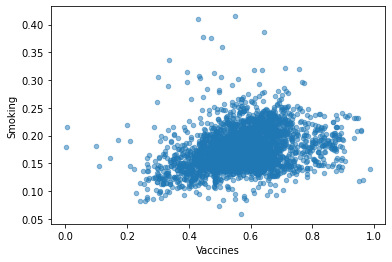

In [27]:
# Plot vaccines against the other factors
pvi.plot.scatter(x='Vaccines', y='Smoking', alpha=0.5)

<AxesSubplot:xlabel='Vaccines', ylabel='Diabetes'>

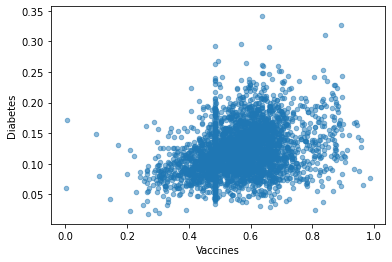

In [28]:
pvi.plot.scatter(x='Vaccines', y='Diabetes', alpha=0.5)

<AxesSubplot:xlabel='Vaccines', ylabel='Obesity'>

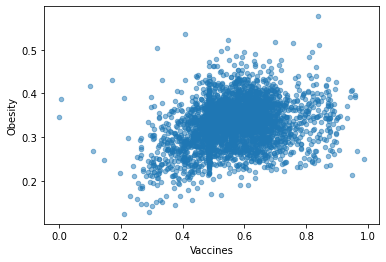

In [29]:
pvi.plot.scatter(x='Vaccines', y='Obesity', alpha=0.5)

<AxesSubplot:xlabel='Vaccines', ylabel='PrematureDeath'>

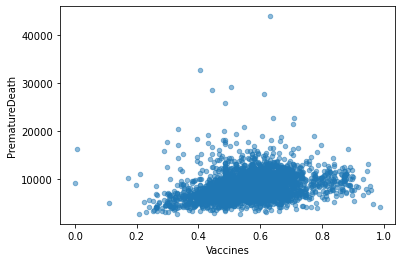

In [30]:
pvi.plot.scatter(x='Vaccines', y='PrematureDeath', alpha=0.5)

<AxesSubplot:xlabel='Vaccines', ylabel='Traffic'>

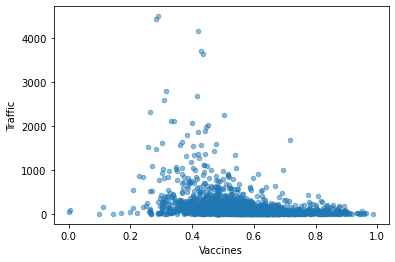

In [31]:
pvi.plot.scatter(x='Vaccines', y='Traffic', alpha=0.5)

<AxesSubplot:xlabel='Vaccines', ylabel='Testing'>

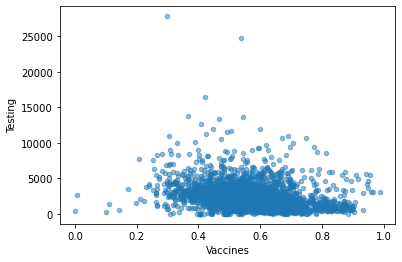

In [32]:
pvi.plot.scatter(x='Vaccines', y='Testing', alpha=0.5)

<AxesSubplot:xlabel='Vaccines', ylabel='Cases'>

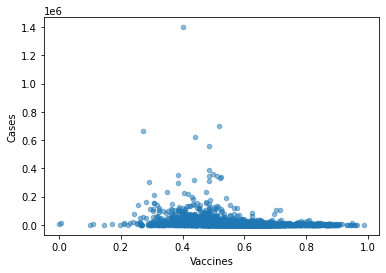

In [33]:
# Here we can see the cases are very low when vaccine rates are high
pvi.plot.scatter(x='Vaccines', y='Cases', alpha=0.5)

<AxesSubplot:xlabel='Vaccines', ylabel='Sick'>

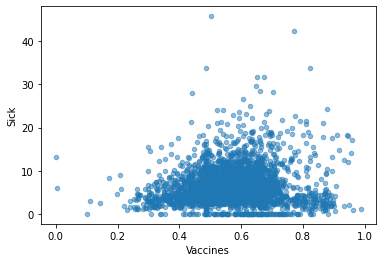

In [34]:
pvi.plot.scatter(x='Vaccines', y='Sick', alpha=0.5)

<AxesSubplot:xlabel='Vaccines', ylabel='Spread'>

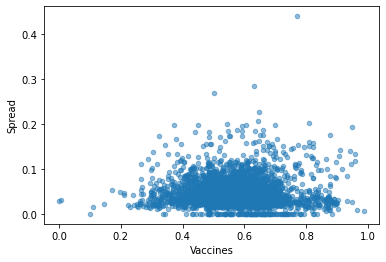

In [35]:
pvi.plot.scatter(x='Vaccines', y='Spread', alpha=0.5)

<AxesSubplot:xlabel='Vaccines', ylabel='Deaths'>

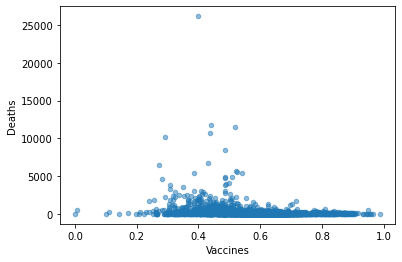

In [37]:
pvi.plot.scatter(x='Vaccines', y='Deaths', alpha=0.5)

<AxesSubplot:title={'center':'Vaccines'}, ylabel='Frequency'>

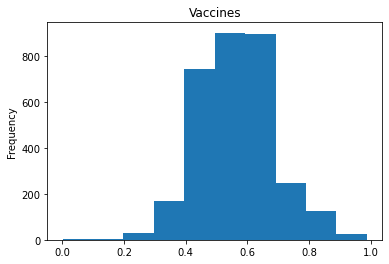

In [20]:
# The higher the score, the worse the vulnerability. The plot is centered around 0.6 with values generally high, hence vaccination rates are low.
pvi["Vaccines"].plot.hist(title="Vaccines")

In [36]:
pvi.shape

(3142, 23)

In [38]:
#pvi.to_csv('PVI_05_Oct_data_clean.csv', index=False)  

## Future ideas
Predict vaccines using the other factors